In [1]:
# import the libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
delivery =pd.read_csv("/content/delivery_time.csv")

In [3]:
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
delivery.shape

(21, 2)

In [6]:
delivery.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
delivery.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [8]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [9]:
#Duplicates
delivery.duplicated()  # if any 2 rows having same values

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [10]:
#count of duplicated rows
delivery[delivery.duplicated()].shape

(0, 2)

In [11]:
#To print duplicated rows
delivery[delivery.duplicated()]

,Delivery Time,Sorting Time


In [12]:
delivery_cleanned1 = delivery.drop_duplicates()

In [13]:
delivery_cleanned1.shape

(21, 2)

In [14]:
#rename the columns
delivery_cleanned2 = delivery_cleanned1.rename({'Delivery Time':'delivery_time',
                                                'Sorting Time': 'sorting_time'},axis = 1)

In [15]:
delivery_cleanned2.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [16]:
#use log transformation on data
delivery_log = np.log(delivery_cleanned2)
delivery_log

,delivery_time,sorting_time
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


<ipython-input-21-9e2c12f59466>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


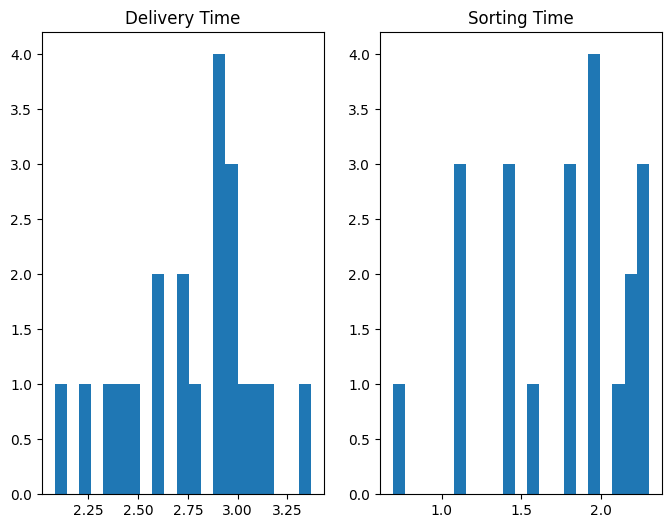

In [21]:
#Histogram 
plt.subplots(figsize = (8,6))
plt.subplot(121)
plt.hist(delivery_log['delivery_time'], bins = 21)
plt.title('Delivery Time')
plt.subplot(122)
plt.hist(delivery_log['sorting_time'], bins = 21)
plt.title('Sorting Time')
plt.show()

<ipython-input-22-39876774541a>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


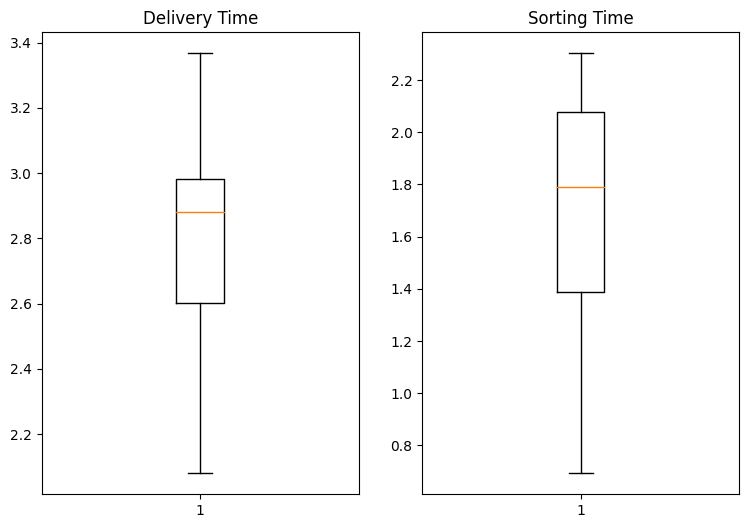

In [22]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(delivery_log['delivery_time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(delivery_log['sorting_time'])
plt.title('Sorting Time')
plt.show()

In [20]:
# Correlation analysis
delivery_log.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.878727
sorting_time,0.878727,1.000000


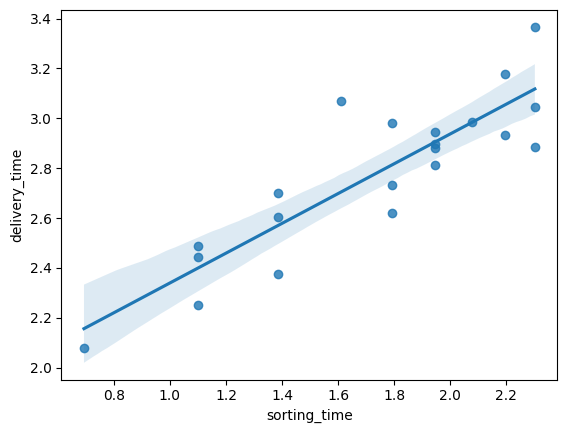

In [23]:
sns.regplot(x=delivery_log['sorting_time'], y=delivery_log['delivery_time']);
plt.show()

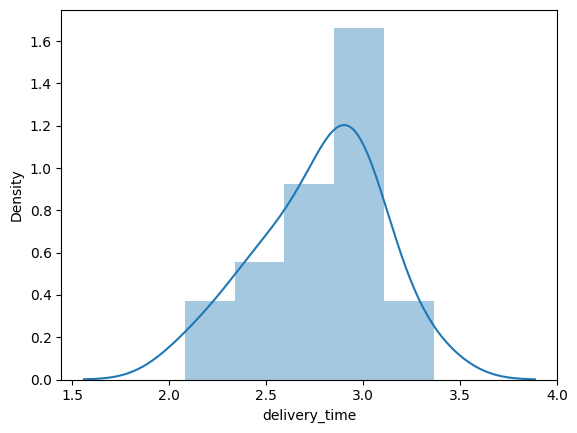

In [24]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(delivery_log['delivery_time'])
plt.show()

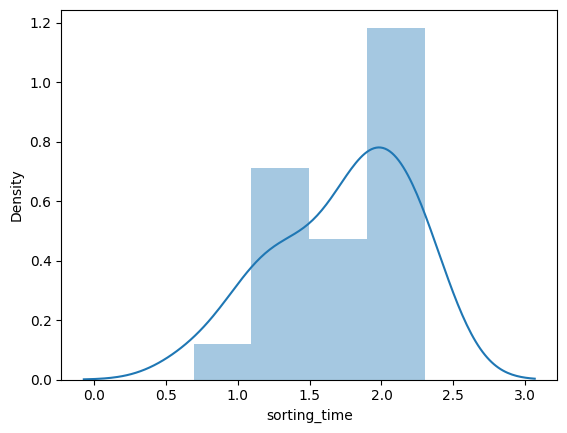

In [25]:
sns.distplot(delivery_log['sorting_time'])
plt.show()

In [26]:
#Fitting a linear regression model
import statsmodels.formula.api as smf # model - regression model
model = smf.ols('delivery_time~sorting_time',data = delivery_log).fit()

In [27]:
# Coefficients are B0 and B1
model.params

Intercept       1.741987
sorting_time    0.597522
dtype: float64

In [28]:
# R squared values 
(model.rsquared,model.rsquared_adj)


(0.77216134926874, 0.7601698413355158)

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           1.60e-07
Time:                        10:09:51   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.7420      0.133     13.086      0.000       1.463       2.021
sorting_time     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Model predictions
# manual predictions for sorting time s
delivery_time=(6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [31]:
new_data = pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [32]:
data_pred = pd.DataFrame(new_data,columns=["sorting_time"])
data_pred

,sorting_time
0,5
1,8


In [33]:
model.predict(data_pred)

0    4.729599
1    6.522166
dtype: float64

## Answer of question no. 2

In [34]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [35]:
#Load the dataset
salary = pd.read_csv("/content/Salary_Data.csv")

In [36]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [37]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [38]:
salary.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [39]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [40]:
salary.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [41]:
salary[salary.duplicated()].shape

(0, 2)

In [42]:
salary[salary.duplicated()]

,YearsExperience,Salary


In [44]:
#Use log transformation on data
salary_log = np.log(salary)
salary_log

,YearsExperience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906
5,1.064711,10.944506
6,1.098612,11.004597
7,1.163151,10.904946
8,1.163151,11.073567
9,1.308333,10.954117


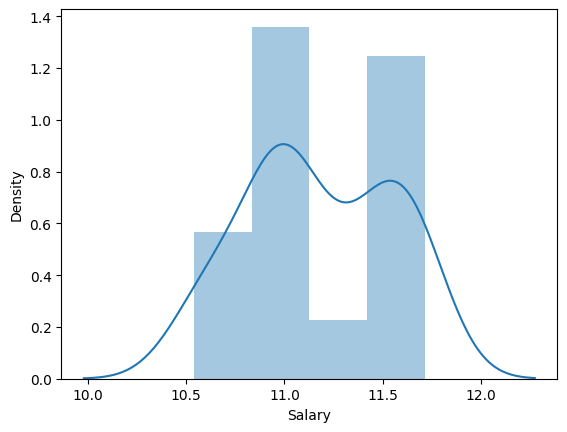

In [45]:
sns.distplot(salary_log['Salary'])
plt.show()

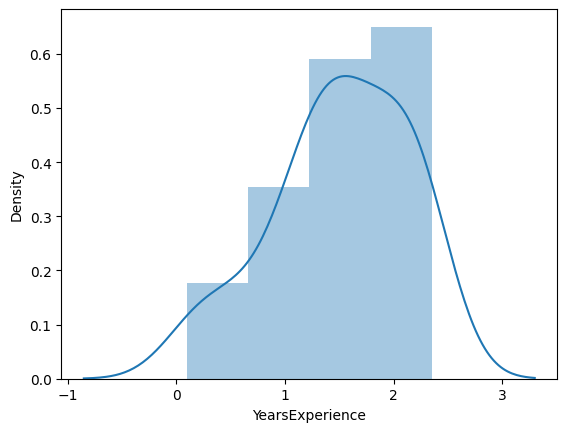

In [46]:
sns.distplot(salary_log['YearsExperience'])
plt.show()

In [47]:
# correlation analysis
salary_log.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.951428
Salary,0.951428,1.000000


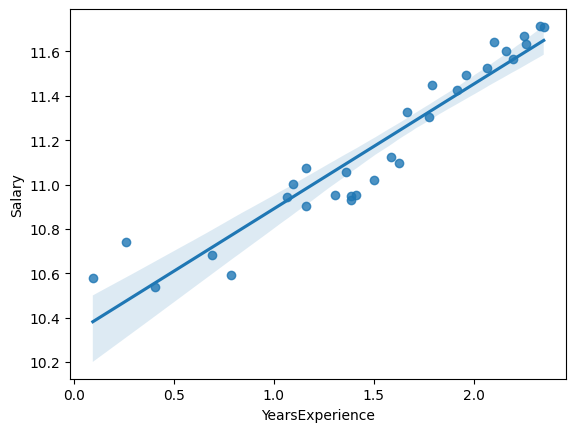

In [48]:
sns.regplot(x=salary_log['YearsExperience'],y=salary_log['Salary']);

In [49]:
# Fitting linear regression model 
model = smf.ols('Salary~YearsExperience', data = salary_log).fit()

In [50]:
# Coefficient values B0 and B1
model.params

Intercept          10.328043
YearsExperience     0.562089
dtype: float64

In [51]:
# R squared values 
(model.rsquared, model.rsquared_adj)

(0.905215072581715, 0.9018298966024905)

In [52]:
# Model information
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           7.40e-16
Time:                        10:14:14   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.3280      0.056    184.868      0.000      10.214      10.442
YearsExperience     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# To test the accuracy of model on new data
new_data = pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [54]:
data_pred = pd.DataFrame(new_data, columns=["YearsExperience"])
data_pred

,YearsExperience
0,3
1,5


In [55]:
model.predict(data_pred)

0    12.014310
1    13.138487
dtype: float64